In [51]:
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
titanicdf= pd.read_csv(r'/content/tested.csv')

In [53]:
titanicdf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
titanicdf.shape

(418, 12)

In [55]:
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [56]:
titanicdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
#Cabin has the most NaN values so we can drop it.
titanicdf.drop(['Cabin'], inplace=True,axis=1)

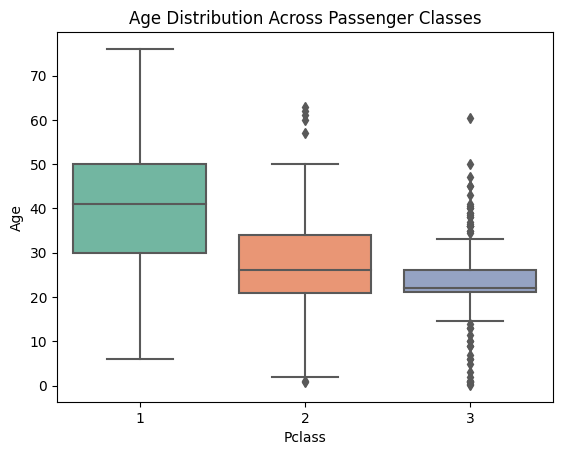

In [139]:
import seaborn as sns
sns.boxplot(y='Age', x='Pclass', data=titanicdf, palette = 'Set2')
plt.title('Age Distribution Across Passenger Classes')
plt.show()

In [59]:
#Replace missing Age values with the mean age corresponding to each PClass.
titanicdf.loc[(titanicdf['Age'].isnull()) & (titanicdf['Pclass']==1),'Age'] = 41
titanicdf.loc[(titanicdf['Age'].isnull())& (titanicdf['Pclass']==2),'Age']= 25
titanicdf.loc[(titanicdf['Age'].isnull())& (titanicdf['Pclass']==3),'Age'] = 22
titanicdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,22.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,22.0,0,0,359309,8.0500,S


In [60]:
#Replace any missing Fare values with the average value
meanval = titanicdf['Fare'].mean()
titanicdf['Fare'].fillna(value=meanval, inplace=True)

In [61]:
titanicdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# *Exploratory Data Analysis*

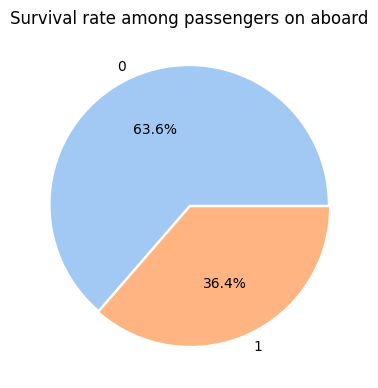

In [132]:
#Survival rate among passengers on aboard
plt.figure(figsize=(4.5,4.5))
y = titanicdf['Survived'].value_counts().values
x = titanicdf['Survived'].value_counts().index
plt.pie(y, labels=x, colors = sns.color_palette('pastel'), autopct='%1.1f%%', explode=[0,0.02])
plt.title('Survival rate among passengers on aboard')
plt.legend
plt.show()

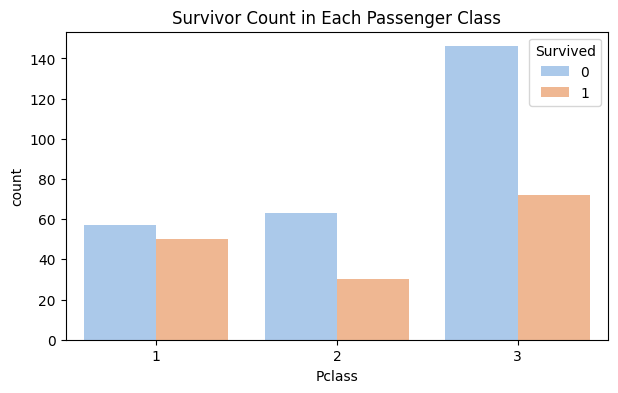

In [137]:
#Survivor Count in Each Passenger Class
plt.figure(figsize=(7,4))
sns.countplot(data=titanicdf ,x='Pclass', hue='Survived', palette='pastel')
plt.title('Survivor Count in Each Passenger Class')
plt.legend
plt.show()

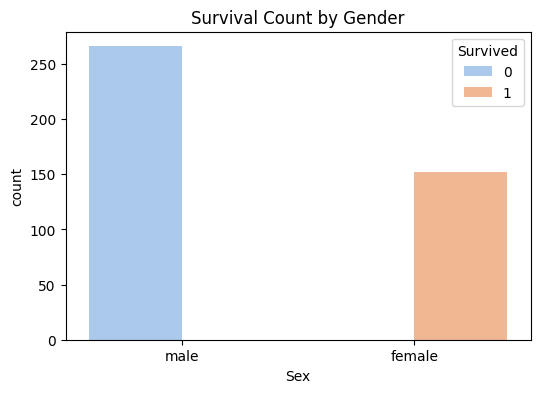

In [135]:
#Count of survivors categorized by gender
plt.figure(figsize=(6,4))
sns.countplot(data=titanicdf ,x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.legend
plt.show()

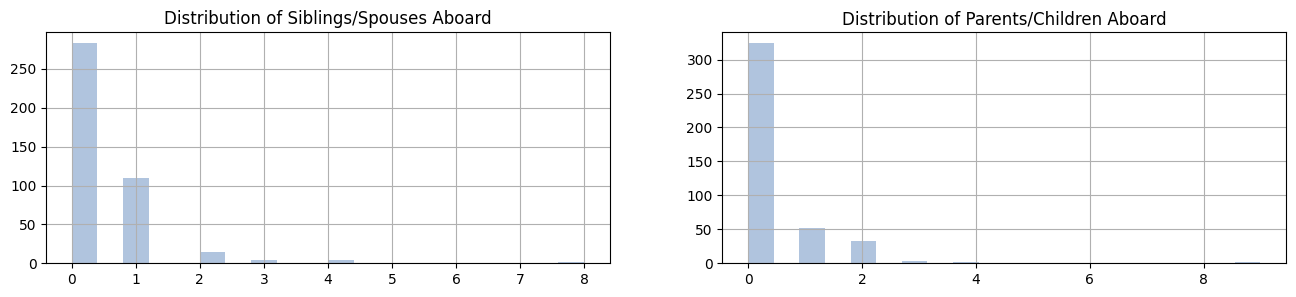

In [138]:
#Distribution of Number of Siblings/Spouses Aboard , Number of Parents/Children Aboard
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
titanicdf['SibSp'].hist(bins=20, color='lightsteelblue')
plt.title('Distribution of Siblings/Spouses Aboard')
plt.subplot(1,2,2)
titanicdf['Parch'].hist(bins=20, color='lightsteelblue')
plt.title('Distribution of Parents/Children Aboard')
plt.legend
plt.show()


In [129]:
#Average fare per Pclass
titanicdf.groupby(['Pclass'])['Fare'].mean().round(2)

Pclass
1    94.28
2    22.20
3    12.57
Name: Fare, dtype: float64

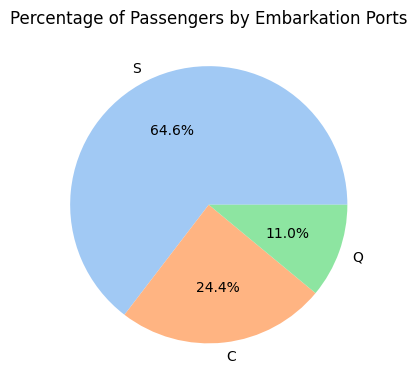

In [136]:
#Percentage of passengers who Embarked at ports(C = Cherbourg; Q = Queenstown; S = Southampton)
plt.figure(figsize=(4.5,4.5))
y = titanicdf['Embarked'].value_counts().values
x = titanicdf['Embarked'].value_counts().index
plt.pie(y, labels=x, colors = sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Percentage of Passengers by Embarkation Ports')
plt.legend
plt.show()